# 2122 World Population Projection

### World Population Data

With the population's doubling time shortening every year, it is no surprise the human population is expected to reach an estimated 8 billion people by next year. In a century from now, the population is projected to continue to grow, but at a slower rate. 

This journal explains Team *They Don't Keep Me Here Cause I'm Gorgeous, They Keep Me Here Cause I'm Smart*'s projection for the world population in 2122. 

### Collection of Data

First, in order to project world population, we collected past population statistics from a variety of sources (shown below). Specifically, we focused on the United Nations' and United States' statistics as we found them to be the most accurate. We also collected information on each year's birth and death rate to help calculate the percent growth of the population from year to year.

The data is parsed into a 2 DataFrames for ease of access.

In [69]:
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

site = "https://en.wikipedia.org/wiki/Estimates_of_historical_world_population"
# parse all tables from Wikipedia page
# use M as decimal point to allow for numbers expressed in millions to be treated as values
tables = pd.read_html(site, header=0, index_col=0, decimal='M')

# grab table with population data from 1950 - 2016
table = tables[2]

# parse growth rate info
growth = pd.read_csv("data/growth_rate.csv", header=0, index_col=0)

# rename and remove unnecessary columns
table.columns = ["US", "PRB", "UN", "Maddison", "HYDE", "Tanton", "Biraben", "M&J", "Thomlinson", "Durand", "Clark"]
table.drop(columns=["PRB", "Maddison", "HYDE", "Tanton", "Biraben", "M&J", "Thomlinson", "Durand", "Clark"], inplace=True)

# parse birth rate and death rate data
BrDrGraph = pd.read_csv ('data/br_dr_stats.csv')

#### Historical Population Growth

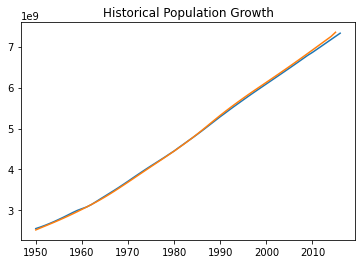

In [70]:
# plot population growth from 1950 to 2016
plt.plot(table)
plt.title("Historical Population Growth")
plt.show()

As shown above, the U.N. and US's estimates are similar and follow a general trend. The plot starts at 1950 as that is when more accurate sources of world population totals began to be collected.

#### Historical Birth and Death Rates

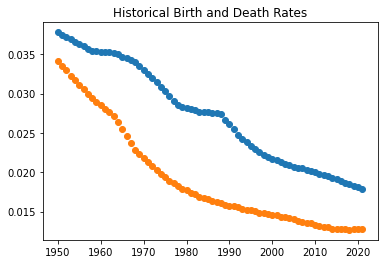

In [71]:
x = BrDrGraph["Year"]
yBR = BrDrGraph["BR"]
yDR = BrDrGraph["DR"] * 1.69

plt.scatter(x, yBR)
plt.scatter(x, yDR)
plt.title("Historical Birth and Death Rates")
plt.show()

#### Fitting Birth and Death Rate

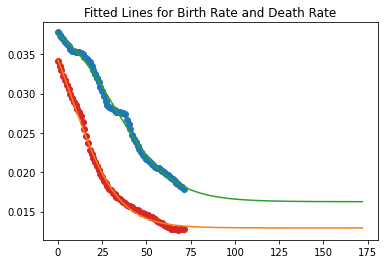

In [72]:
un = table.UN / 1e9
us = table.US / 1e9

t0 = un.index[0]
t1 = un.index[-2]
time = t1 - t0

p0 = un[t0]
p1 = un[t1]

xNorm = x - 1950

# sigmoid function
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k * (x - x0))) + b
    return (y)

# give initial data to fit function
p0BR = [max(yBR), np.median(x), 1, min(yBR)]
p0DR = [max(yDR), np.median(x), 1, min(yDR)]

# fit data to a sigmoid curve
poptBR, pcovBR = curve_fit(sigmoid, x, yBR, p0BR, method="dogbox")
poptDR, pcovDR = curve_fit(sigmoid, x, yDR, p0DR, method="dogbox")

# add years to project to series
i = 71
while x[i] != 2122: 
    x[i + 1] = x[i] + 1
    i = i + 1
   
# project birth and death rates based on sigmoid curve 
br = sigmoid(x, *poptBR)
dr = sigmoid(x, *poptDR)

plt.scatter(xNorm, yBR, color="tab:blue")
plt.plot(br, color="tab:green")
plt.scatter(xNorm, yDR, color="tab:red")
plt.plot(dr, color="tab:orange")
plt.title("Fitted Lines for Birth Rate and Death Rate")
plt.show()

### Projecting Population

In order to predict the world population, we decided to factor in the birth and death rate. Using past data, we found that these two attributes followed a sigmoid function, so we used that function to plot their change over time including projecting birth and death rate into the next centure.

From there, we used the projected birth and death rate in a proportional growth function to project total world population.

Projected population in 2122: 10.935027106734942 billion people


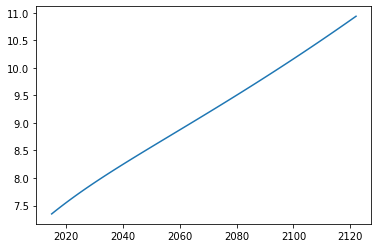

In [73]:
# project total population growth for each year from 2015 to 2122
results = {}
results[t1] = p1
for t in range(t1, 2122):
    results[t + 1] = results[t] + (results[t] * (br[t - 1950] - dr[t - 1950]))
    
s = pd.Series(results, name="Population")
s.plot()
print("Projected population in 2122: " + str(results[2122]) + " billion people")

The data we used gives a wide variety of different accuracies, with some countries rounding and some countries not. Therefore, in order to bypass the false precision, we rounded our total world population to only 3 significant figures.  

In conclusion, we found that the world population in 2122 will be approximately:

### 10.9 Billion People